# The Eras of MLB Baseball

Throughout the history of Major League baseball, the game has changed and developed. This notebook displays how certain statistics have changed based on the different eras of baseball. There eight different eras of Major League baseball. 
- [<i>19th Century Era (1871-1900)</i>](https://www.baseball-reference.com/bullpen/19th_Century)- The beginning of baseball 
- [<i>Dead Ball Era (1901-1919)</i>](https://www.baseball-reference.com/bullpen/Deadball_Era)- era highly focused on pitching and defense
- [<i>Lively Ball Era (1920-1941)</i>](https://www.baseball-reference.com/bullpen/Lively_ball_era)- era of increased offense
- [<i>Integration Era (1942-1960)</i>](https://www.baseball-reference.com/bullpen/Integration)- integration of MLB
- [<i>Expansion Era (1961-1976)</i>](https://en.wikipedia.org/wiki/1961_Major_League_Baseball_expansion)- addition of two more teams to both the National and American Leagues
- [<i>Free Agency Era (1977-1993)</i>](https://news.illinois.edu/blog/view/6367/198486)- free agency is introduced in MLB
- [<i>Steroid Era (1994-2005)</i>](http://www.espn.com/mlb/topics/_/page/the-steroids-era)- increased offense and widley used PEDs
- <i>Modern Era (2006-Present)</i> - present day MLB

The database used is Sean Lahman's History of Baseball database. It holds all seasonal statistics from every player that has played in Major League Baseball from 1871 to 2015. 

In [2]:
%matplotlib inline

In [28]:
import pandas as pd
from pylab import *
from sqlalchemy import create_engine
import itertools
import matplotlib.patches as mpatches

# Create connection.
engine = create_engine('sqlite:///:memory:')

In [4]:
batting = pd.DataFrame.from_csv('baseball/batting.csv', index_col = None, encoding = 'utf-8')
batting.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [5]:
batting.to_sql('batting', engine, index = False)

In [6]:
pd.read_sql_table('batting', engine).head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp
0,abercda01,1871,1,TRO,None,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,None,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,None,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,None,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,None,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


In [7]:
#Queries to pull data for league wide HR and AVG by year
total_hr = pd.read_sql_query('SELECT year, SUM(hr) AS total_hr FROM batting GROUP BY year', engine)
total_avg = pd.read_sql_query('SELECT year, SUM(ab) AS total_ab, SUM(h) AS total_h FROM batting GROUP BY year', engine)

In [8]:
#Adding a column to calculate league wide batting average.
ab = total_avg['total_ab']
h = total_avg['total_h']
total_avg['avg'] = (h / ab)
total_avg.head()

,year,total_ab,total_h,avg
0,1871,10822.0,3101.0,0.286546
1,1872,15679.0,4487.0,0.286179
2,1873,16974.0,4923.0,0.290032
3,1874,19104.0,5226.0,0.273555
4,1875,26833.0,6812.0,0.253867


In [9]:
fig = plt.figure(figsize=(8,4), dpi=100)

In [10]:
year = total_hr['year']
hr = total_hr['total_hr']
year_avg = total_avg['year']
avg = total_avg['avg']

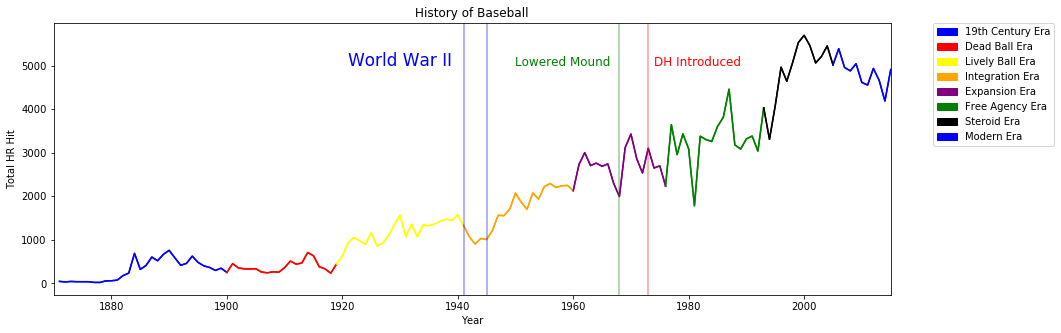

In [44]:
#Total Home Runs by year
fig, axes = plt.subplots(1,1, figsize = (15, 5))

for x in total_hr :
    axes.plot(year[(year <= 1900)], hr[(year <= 1900)], color="blue", label = '19th Century Era')
    axes.plot(year[(year >= 1900) & (year <= 1919)], hr[(year >= 1900) & (year <= 1919)], color="red", label = 'Dead Ball Era')
    axes.plot(year[(year >= 1919) & (year <= 1941)], hr[(year >= 1919) & (year <= 1941)], color="yellow", label = 'Lively Ball Era')
    axes.plot(year[(year >= 1941) & (year <= 1960)], hr[(year >= 1941) & (year <= 1960)], color="orange", label = 'Integration Era')
    axes.plot(year[(year >= 1960) & (year <= 1976)], hr[(year >= 1960) & (year <= 1976)], color="purple", label = 'Expansion Era')
    axes.plot(year[(year >= 1976) & (year <= 1993)], hr[(year >= 1976) & (year <= 1993)], color="green", label = 'Free Agency Era')
    axes.plot(year[(year >= 1993) & (year <= 2005)], hr[(year >= 1993) & (year <= 2005)], color="black", label = 'Steroid Era')
    axes.plot(year[(year >= 2005)], hr[(year >= 2005)], color="blue", label = 'Modern Era')
    
axes.text(1921, 5000, 'World War II', fontsize=17, color="blue")
axes.text(1950, 5000, 'Lowered Mound', fontsize=12, color="green")
axes.text(1974, 5000, 'DH Introduced', fontsize=12, color="red")

era_1 = mpatches.Patch(color='blue', label='19th Century Era')
era_2 = mpatches.Patch(color='red', label='Dead Ball Era')
era_3 = mpatches.Patch(color='yellow', label='Lively Ball Era')
era_4 = mpatches.Patch(color='orange', label='Integration Era')
era_5 = mpatches.Patch(color='purple', label='Expansion Era')
era_6 = mpatches.Patch(color='green', label='Free Agency Era')
era_7 = mpatches.Patch(color='black', label='Steroid Era')
era_8 = mpatches.Patch(color='blue', label='Modern Era')
plt.legend(handles=[era_1, era_2, era_3, era_4, era_5, era_6, era_7, era_8], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

axes.set_xlabel('Year')
axes.set_ylabel('Total HR Hit')
axes.set_title('History of Baseball')
axes.set_xlim([1870, 2015])
axes.set_xlim([1870, 2015])

#WWII
plt.axvline(x = 1941, alpha = .4, color = 'blue')
plt.axvline(x = 1945, alpha = .4, color = 'blue')

#Lowered Mound
plt.axvline(x = 1968, alpha = .4, color = 'green')

#DH
plt.axvline(x = 1973, alpha = .4, color = 'red')

The progression of home runs is obvious from the graph shown above. The first spike in home runs on the 19th Century Era 

In [12]:
fig = plt.figure(figsize=(8,4), dpi=100)

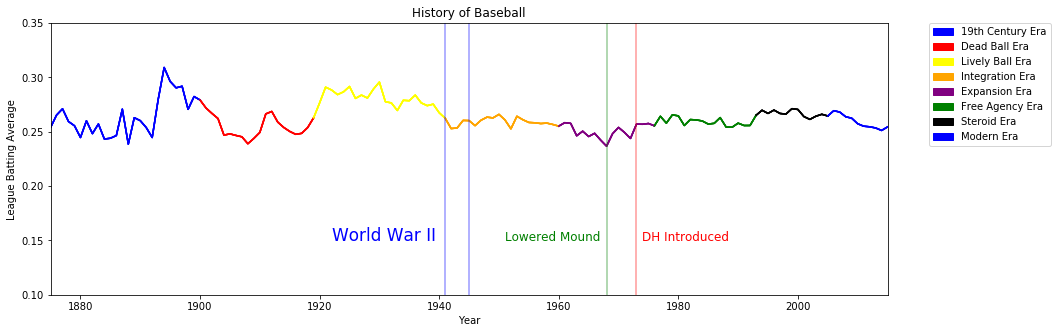

In [43]:
#League wide batting average by year
fig, axes = plt.subplots(figsize = (15, 5))

for x in total_avg :
    axes.plot(year_avg[(year_avg <= 1900)], avg[(year_avg <= 1900)], color="blue", label = '19th Century Era')
    axes.plot(year_avg[(year_avg >= 1900) & (year_avg <= 1919)], avg[(year_avg >= 1900) & (year_avg <= 1919)], color="red", label = 'Dead Ball Era')
    axes.plot(year_avg[(year_avg >= 1919) & (year_avg <= 1941)], avg[(year_avg >= 1919) & (year_avg <= 1941)], color="yellow", label = 'Lively Ball Era')
    axes.plot(year_avg[(year_avg >= 1941) & (year_avg <= 1960)], avg[(year_avg >= 1941) & (year_avg <= 1960)], color="orange", label = 'Integration Era')
    axes.plot(year_avg[(year_avg >= 1960) & (year_avg <= 1976)], avg[(year_avg >= 1960) & (year_avg <= 1976)], color="purple", label = 'Expansion Era')
    axes.plot(year_avg[(year_avg >= 1976) & (year_avg <= 1993)], avg[(year_avg >= 1976) & (year_avg <= 1993)], color="green", label = 'Free Agency Era')
    axes.plot(year_avg[(year_avg >= 1993) & (year_avg <= 2005)], avg[(year_avg >= 1993) & (year_avg <= 2005)], color="black", label = 'Steroid Era')
    axes.plot(year_avg[(year_avg >= 2005)], avg[(year_avg >= 2005)], color="blue", label = 'Modern Era')
    axes.legend(loc = 1, ncol = 2)    

era_1 = mpatches.Patch(color='blue', label='19th Century Era')
era_2 = mpatches.Patch(color='red', label='Dead Ball Era')
era_3 = mpatches.Patch(color='yellow', label='Lively Ball Era')
era_4 = mpatches.Patch(color='orange', label='Integration Era')
era_5 = mpatches.Patch(color='purple', label='Expansion Era')
era_6 = mpatches.Patch(color='green', label='Free Agency Era')
era_7 = mpatches.Patch(color='black', label='Steroid Era')
era_8 = mpatches.Patch(color='blue', label='Modern Era')
plt.legend(handles=[era_1, era_2, era_3, era_4, era_5, era_6, era_7, era_8], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

axes.set_title('History of Baseball')
axes.set_xlabel('Year')
axes.set_ylabel('League Batting Average')
axes.set_xlim([1875, 2015])
axes.set_ylim([.1, .35])

#WWII
plt.axvline(x = 1941, alpha = .4, color = 'blue')
plt.axvline(x = 1945, alpha = .4, color = 'blue')

#Lowered Mound
plt.axvline(x = 1968, alpha = .4, color = 'green')

#DH
plt.axvline(x = 1973, alpha = .4, color = 'red')

axes.text(1922, .15, 'World War II', fontsize=17, color="blue")
axes.text(1951, .15, 'Lowered Mound', fontsize=12, color="green")
axes.text(1974, .15, 'DH Introduced', fontsize=12, color="red")

In [14]:
#Load pitching data
pitching = pd.DataFrame.from_csv('baseball/pitching.csv', index_col = None, encoding = 'utf-8')
pitching.head()

,player_id,year,stint,team_id,league_id,w,l,g,gs,cg,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,g_idp
0,bechtge01,1871,1,PH1,NaN,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,NaN,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,NaN,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,NaN,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,NaN,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [15]:
pitching.to_sql('pitching', engine, index = False)
pd.read_sql_table('pitching', engine).head()

,player_id,year,stint,team_id,league_id,w,l,g,gs,cg,...,ibb,wp,hbp,bk,bfp,gf,r,sh,sf,g_idp
0,bechtge01,1871,1,PH1,None,1,2,3,3,2,...,NaN,NaN,NaN,0,NaN,NaN,42,NaN,NaN,NaN
1,brainas01,1871,1,WS3,None,12,15,30,30,30,...,NaN,NaN,NaN,0,NaN,NaN,292,NaN,NaN,NaN
2,fergubo01,1871,1,NY2,None,0,0,1,0,0,...,NaN,NaN,NaN,0,NaN,NaN,9,NaN,NaN,NaN
3,fishech01,1871,1,RC1,None,4,16,24,24,22,...,NaN,NaN,NaN,0,NaN,NaN,257,NaN,NaN,NaN
4,fleetfr01,1871,1,NY2,None,0,1,1,1,1,...,NaN,NaN,NaN,0,NaN,NaN,21,NaN,NaN,NaN


In [16]:
#Query to pull data for ERA
df_era = pd.read_sql_query('SELECT year, SUM(er) AS total_er, SUM(ipouts) / 3 as total_ip FROM pitching GROUP BY year', engine)
df_era.head()

,year,total_er,total_ip
0,1871,1055,2250.000000
1,1872,1357,3285.333333
2,1873,1295,3584.666667
3,1874,1399,4172.666667
4,1875,1692,6192.333333


In [17]:
#Calculations for league wide ERA
df_era['yr_era'] = (df_era['total_er'] / df_era['total_ip']) * 9
year = df_era['year']
era = df_era['yr_era']
df_era.head()

,year,total_er,total_ip,yr_era
0,1871,1055,2250.000000,4.220000
1,1872,1357,3285.333333,3.717431
2,1873,1295,3584.666667,3.251348
3,1874,1399,4172.666667,3.017495
4,1875,1692,6192.333333,2.459170


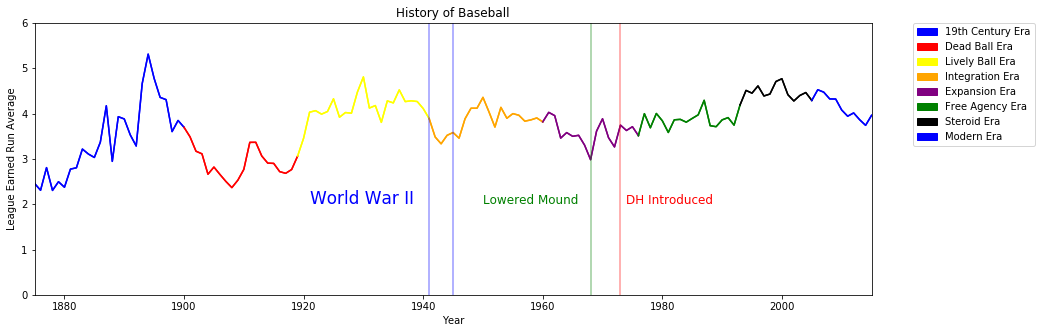

In [37]:
#League ERA by year
fig, axes = plt.subplots(figsize = (15, 5))

for x in total_hr :
    axes.plot(year[(year <= 1900)], era[(year <= 1900)], color="blue", label = '19th Century Era')
    axes.plot(year[(year >= 1900) & (year <= 1919)], era[(year >= 1900) & (year <= 1919)], color="red", label = 'Dead Ball Era')
    axes.plot(year[(year >= 1919) & (year <= 1941)], era[(year >= 1919) & (year <= 1941)], color="yellow", label = 'Lively Ball Era')
    axes.plot(year[(year >= 1941) & (year <= 1960)], era[(year >= 1941) & (year <= 1960)], color="orange", label = 'Integration Era')
    axes.plot(year[(year >= 1960) & (year <= 1976)], era[(year >= 1960) & (year <= 1976)], color="purple", label = 'Expansion Era')
    axes.plot(year[(year >= 1976) & (year <= 1993)], era[(year >= 1976) & (year <= 1993)], color="green", label = 'Free Agency Era')
    axes.plot(year[(year >= 1993) & (year <= 2005)], era[(year >= 1993) & (year <= 2005)], color="black", label = 'Steroid Era')
    axes.plot(year[(year >= 2005)], era[(year >= 2005)], color="blue", label = 'Modern Era')

axes.set_xlabel('Year')
axes.set_title('History of Baseball')
axes.set_ylabel('League Earned Run Average')
axes.set_xlim([1875, 2015])
axes.set_ylim([0, 6])

era_1 = mpatches.Patch(color='blue', label='19th Century Era')
era_2 = mpatches.Patch(color='red', label='Dead Ball Era')
era_3 = mpatches.Patch(color='yellow', label='Lively Ball Era')
era_4 = mpatches.Patch(color='orange', label='Integration Era')
era_5 = mpatches.Patch(color='purple', label='Expansion Era')
era_6 = mpatches.Patch(color='green', label='Free Agency Era')
era_7 = mpatches.Patch(color='black', label='Steroid Era')
era_8 = mpatches.Patch(color='blue', label='Modern Era')
plt.legend(handles=[era_1, era_2, era_3, era_4, era_5, era_6, era_7, era_8], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

axes.text(1921, 2, 'World War II', fontsize=17, color="blue")
axes.text(1950, 2, 'Lowered Mound', fontsize=12, color="green")
axes.text(1974, 2, 'DH Introduced', fontsize=12, color="red")

#WWII
plt.axvline(x = 1941, alpha = .4, color = 'blue')
plt.axvline(x = 1945, alpha = .4, color = 'blue')

#Lowered Mound
plt.axvline(x = 1968, alpha = .4, color = 'green')

#DH
plt.axvline(x = 1973, alpha = .4, color = 'red')



In [19]:
#Query to pull total league strikeouts
df_so = pd.read_sql_query('SELECT year, SUM(so) AS so FROM pitching GROUP BY year', engine)
year = df_so['year']
so = df_so['so']
df_so.head()

,year,so
0,1871,175
1,1872,252
2,1873,240
3,1874,192
4,1875,387


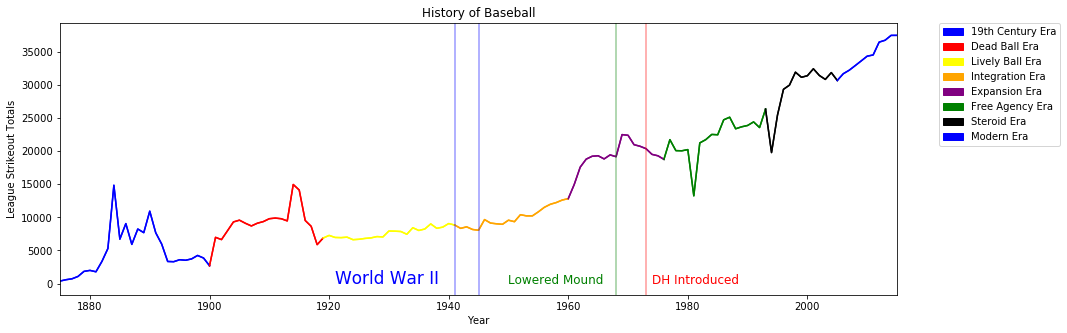

In [38]:
#Total strikeouts by year
fig, axes = plt.subplots(figsize = (15, 5))

for x in total_hr :
    axes.plot(year[(year <= 1900)], so[(year <= 1900)], color="blue", label = '19th Century Era')
    axes.plot(year[(year >= 1900) & (year <= 1919)], so[(year >= 1900) & (year <= 1919)], color="red", label = 'Dead Ball Era')
    axes.plot(year[(year >= 1919) & (year <= 1941)], so[(year >= 1919) & (year <= 1941)], color="yellow", label = 'Lively Ball Era')
    axes.plot(year[(year >= 1941) & (year <= 1960)], so[(year >= 1941) & (year <= 1960)], color="orange", label = 'Integration Era')
    axes.plot(year[(year >= 1960) & (year <= 1976)], so[(year >= 1960) & (year <= 1976)], color="purple", label = 'Expansion Era')
    axes.plot(year[(year >= 1976) & (year <= 1993)], so[(year >= 1976) & (year <= 1993)], color="green", label = 'Free Agency Era')
    axes.plot(year[(year >= 1993) & (year <= 2005)], so[(year >= 1993) & (year <= 2005)], color="black", label = 'Steroid Era')
    axes.plot(year[(year >= 2005)], so[(year >= 2005)], color="blue", label = 'Modern Era')

axes.set_title('History of Baseball')
axes.set_xlabel('Year')
axes.set_ylabel('League Strikeout Totals')
axes.set_xlim([1875, 2015])

era_1 = mpatches.Patch(color='blue', label='19th Century Era')
era_2 = mpatches.Patch(color='red', label='Dead Ball Era')
era_3 = mpatches.Patch(color='yellow', label='Lively Ball Era')
era_4 = mpatches.Patch(color='orange', label='Integration Era')
era_5 = mpatches.Patch(color='purple', label='Expansion Era')
era_6 = mpatches.Patch(color='green', label='Free Agency Era')
era_7 = mpatches.Patch(color='black', label='Steroid Era')
era_8 = mpatches.Patch(color='blue', label='Modern Era')
plt.legend(handles=[era_1, era_2, era_3, era_4, era_5, era_6, era_7, era_8], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

axes.text(1921, 2, 'World War II', fontsize=17, color="blue")
axes.text(1950, 2, 'Lowered Mound', fontsize=12, color="green")
axes.text(1974, 2, 'DH Introduced', fontsize=12, color="red")

#WWII
plt.axvline(x = 1941, alpha = .4, color = 'blue')
plt.axvline(x = 1945, alpha = .4, color = 'blue')

#Lowered Mound
plt.axvline(x = 1968, alpha = .4, color = 'green')

#DH
plt.axvline(x = 1973, alpha = .4, color = 'red')
